In [1]:
# temporarly add to path for testing purposes before package creation
import sys
sys.path.append("../../")

In [2]:
import numpy as np
from phdtools import plots
from phdtools import computes
from sklearn import datasets

# Data handling and plotting

In `phdplots` we can find some simple tools to help with generic data handling and plotting.

We start with a small example using a test dataset, which will be imported from the sklearn library.

In [4]:
# number of points
Np = 1000
# data additional information
dummy_data_dict = dict(
    n_samples = Np,
    factor = 0.42,
    noise = 0.1,
    random_state = 73
)
dummy_data_dict

{'n_samples': 1000, 'factor': 0.42, 'noise': 0.1, 'random_state': 73}

In [5]:
# generation of a dummy dataset using sklearn lib
# (official page for details)
X, y = datasets.make_circles(**dummy_data_dict)
print(X.shape, y.shape)

(1000, 2) (1000,)


We can easily generate normal distributed data using the numpy library.

In [6]:
# 2D gaussian
X2dG = np.random.multivariate_normal([0,0], [[1,0],[0,1]], Np)
# 3D gaussian
X3dG = np.random.multivariate_normal([0,0,0], [[1,0,0],[0,1,0],[0,0,1]], Np)

### Data sampling examples

All these examples are intended to work with the data matrix $X$ being regarded as 

$X = [N_{samples} \times N_{features}]$ ,

the sampling will select a number $N_{sampling} << N_{samples}$ chosen following a certain set rule.

**1. random sampling**

In [7]:
N_sampling = 100

In [8]:
X_rnd, y_rnd = computes.data.random_shuffle(X=X, 
                                            Y=y, 
                                            n=N_sampling)
X_rnd.shape, y_rnd.shape

((100, 2), (100,))

In [9]:
X2dG_rnd = computes.data.random_shuffle(X=X2dG,
                                        Y=None,
                                        n=N_sampling)
X2dG_rnd.shape

(100, 2)

**2. furthest point sampling**

In [10]:
X_fps, fps_ndx = computes.data.FPS(X=X, 
                                   n=100)
X_fps.shape

(100, 2)

In [11]:
X2dG_fps, _ = computes.data.FPS(X=X2dG, 
                                n=100)
X2dG_fps.shape

(100, 2)

Finally, from the `phdtools.plots` we can access few simplified way to plot these data.
We start by init the figure variables in a dictionary.

In [12]:
# init the figure object details
fig1_setup = dict(
    plots = 6,
    max_col = 3,
    # these are set by default
    # fig_frame = (3.3,3),
    # res = 200
)

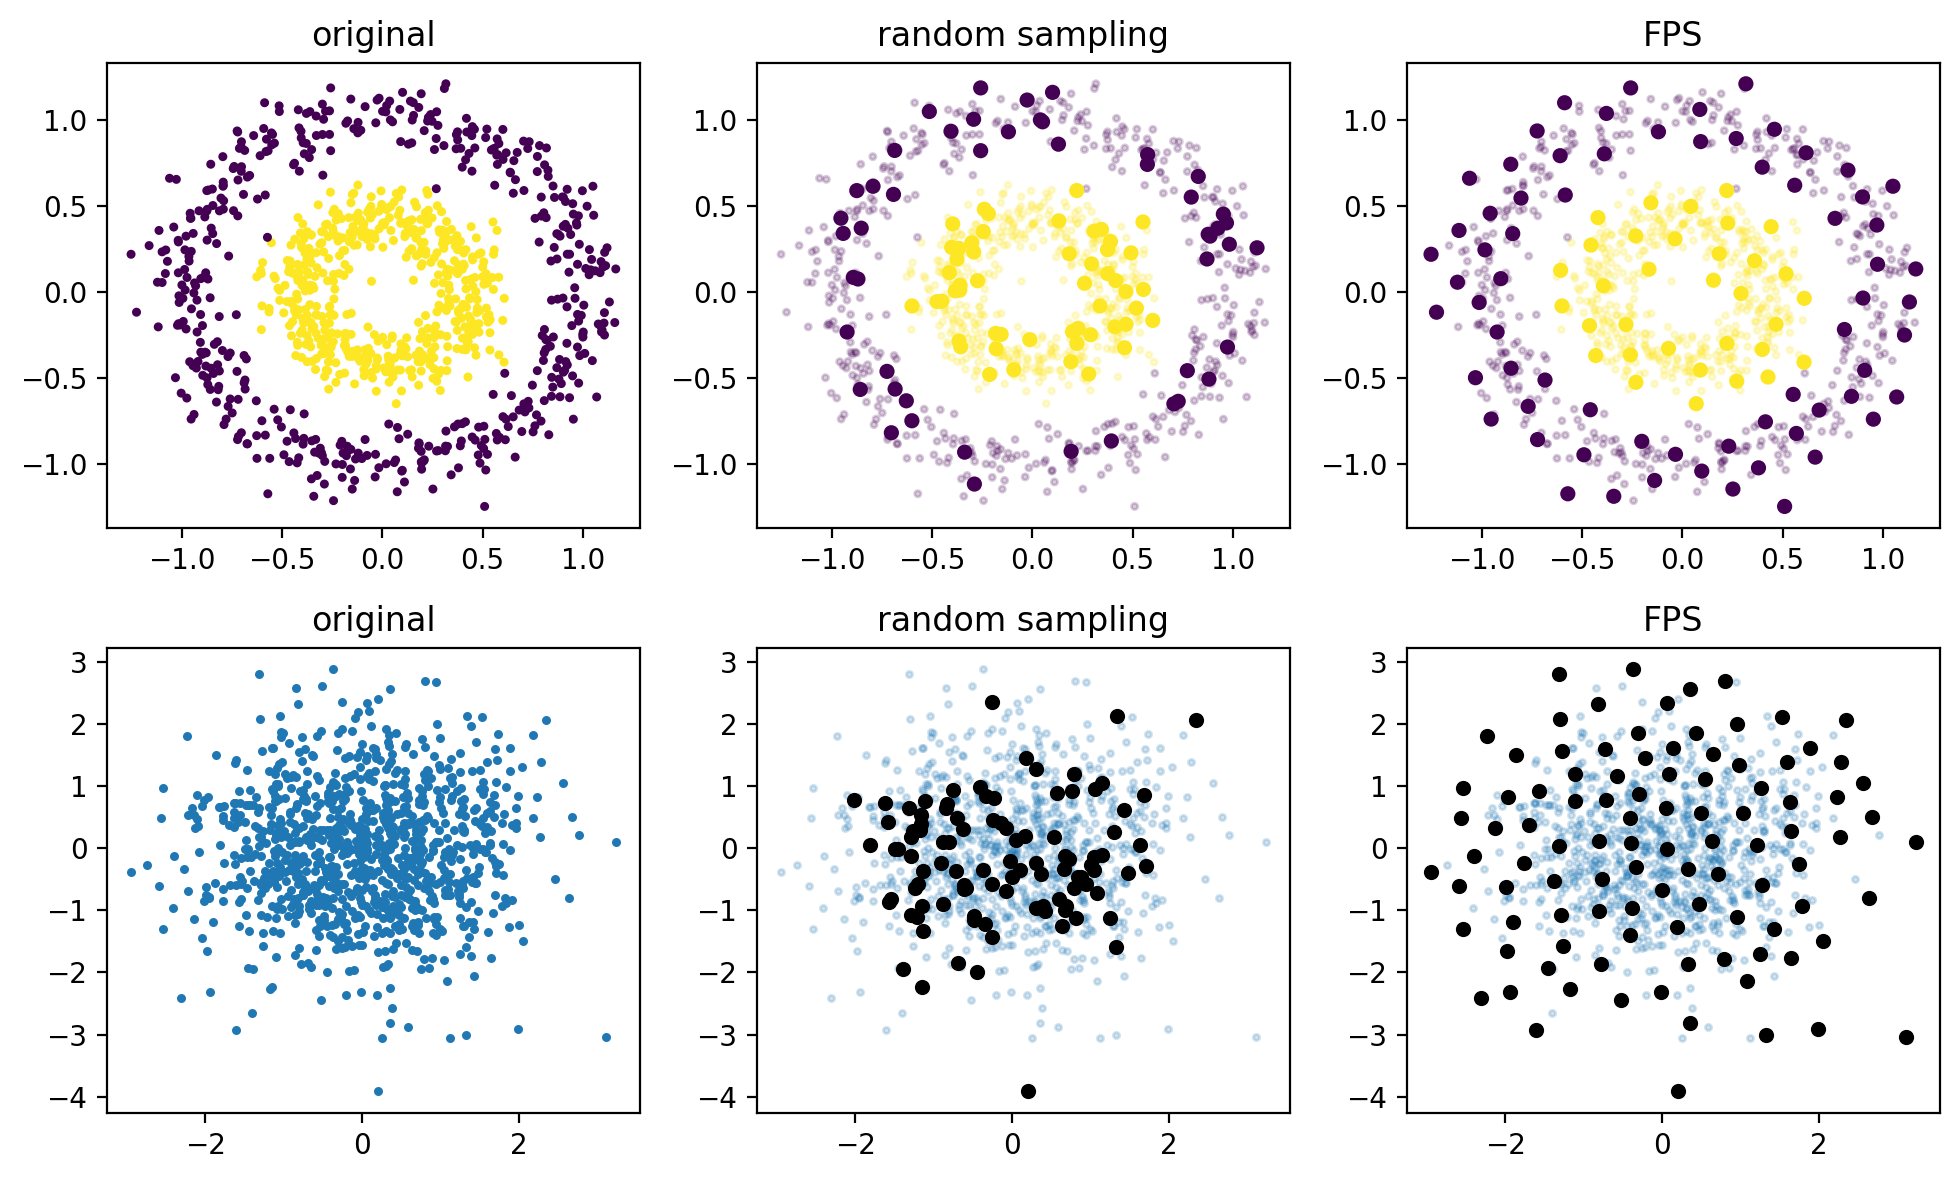

In [13]:
fig1, ax = plots.get_axes(**fig1_setup)
ax[0].scatter(*X.T, c=y, s=5)
ax[1].scatter(*X.T, c=y, s=5, alpha=0.2)
ax[1].scatter(*X_rnd.T, c=y_rnd, s=20)
ax[2].scatter(*X.T, c=y, s=5, alpha=0.2)
y_fps = y[fps_ndx]
ax[2].scatter(*X_fps.T, c=y_fps, s=20)

ax[3].scatter(*X2dG.T, s=5)
ax[4].scatter(*X2dG.T, s=5, alpha=0.2)
ax[4].scatter(*X2dG_rnd.T, c='k', s=20)
ax[5].scatter(*X2dG.T, s=5, alpha=0.2)
ax[5].scatter(*X2dG_fps.T, c='k', s=20)

plt_titles = ['original', 'random sampling', 'FPS']
for i in range(fig1_setup['plots']):
    ax[i].set_title(plt_titles[i%fig1_setup['max_col']])

fig1.tight_layout()

### Data normalisation

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
# 2D gaussian not standadised
X2dG_ns = np.random.multivariate_normal([-2,3], [[2,1],[1,1]], Np)
X2dG_ns.mean(axis=0), X2dG_ns.std(axis=0)

(array([-1.96784405,  3.03172214]), array([1.39617108, 1.01775182]))

In [17]:
X2dG_norm = StandardScaler().fit_transform(X=X2dG_ns)
X2dG_norm.mean(axis=0), X2dG_norm.std(axis=0)

(array([ 2.89240853e-15, -1.17283960e-15]), array([1., 1.]))

In [19]:
fig2_setup = dict(
    plots = 2,
    max_col = 2,
    fig_frame = (3.3,3),
    res = 200
)

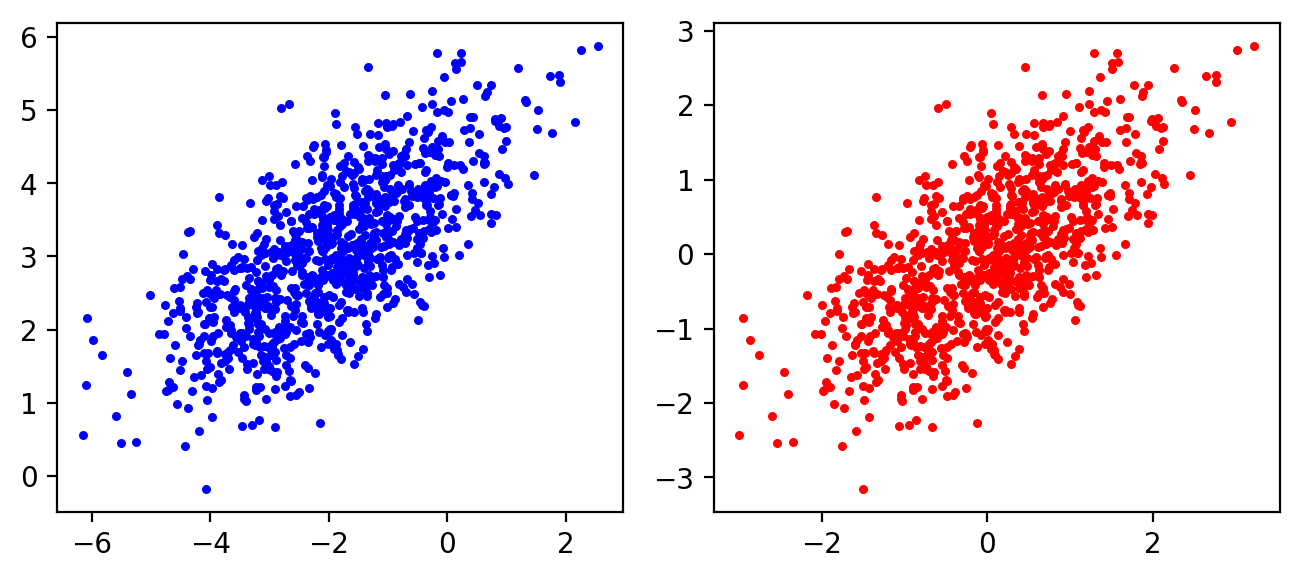

In [20]:
fig2, ax = plots.get_axes(**fig2_setup)
ax[0].scatter(*X2dG_ns.T, s=5, c='b')
ax[1].scatter(*X2dG_norm.T, s=5, c='r')
fig2.tight_layout()

# FES computation

In computes there is a simple implementation for computing the 1D or 2D FES from data.

The FES object can be initialized by defining a temperature and an energy unit.

In [3]:
fes_calc = computes.fes.FES(temperature=300,
                            units='kcal')

print(fes_calc.unit, fes_calc.temp)

kcal 300


Temperature and units can be change at any time

In [4]:
fes_calc.unit = 'kJ'
fes_calc.temp = 273

print(fes_calc.unit, fes_calc.temp)

kJ 273


The fes can be computing by giving a dataset, either 1D or 2D are supported.

We will recompute the circle dataset inserting more points this time.

In [5]:
fes_data_dict = dict(
    n_samples = 10000,
    factor = 0.42,
    noise = 0.5,
    random_state = 73
)
X, y = datasets.make_circles(**fes_data_dict)

In [6]:
example_fes_1d = fes_calc.fit(X=X[:,0], bins=20)

Computing 1D ...
0.0035s



In [7]:
example_fes_2d = fes_calc.fit(X=X[:,0], Y=X[:,1], bins=20)

Computing 2D ...
0.0048s



/home/agardin/workPHD/PHDtools/example/notebook/../../phdtools/computes/fes.py:120: RuntimeWarning: divide by zero encountered in log
  zeta = -1 * kbt * np.log(histo)


The variable in return contain a dictionary with the dimension of the FES the energy values and the values of the CV on which the FES is computed (divided for the chosen binning).

In [8]:
example_fes_1d

{'dim': 1,
 'fes': array([14.93074739, 13.35740844, 10.68204041,  7.4496977 ,  4.99844277,
         3.32731062,  1.80234166,  1.0915957 ,  0.21855059,  0.03499485,
         0.        ,  0.27485979,  0.73768832,  1.58282961,  2.7139725 ,
         4.7808057 ,  6.73451152,  9.94338093, 12.85090643, 16.50408633]),
 'grid': array([-2.88643568, -2.60194582, -2.31745595, -2.03296609, -1.74847623,
        -1.46398636, -1.1794965 , -0.89500663, -0.61051677, -0.3260269 ,
        -0.04153704,  0.24295283,  0.52744269,  0.81193255,  1.09642242,
         1.38091228,  1.66540215,  1.94989201,  2.23438188,  2.51887174,
         2.8033616 ])}

We can plot the results using the tools from the plot tools.

In [30]:
fig3_setup = dict(
    plots = 3,
    max_col = 3,
    fig_frame = (3.3,3),
    res = 200
)

In [31]:
data_list = [X, X2dG, X2dG_norm]

Plotting 2D FES.
Plotting 2D FES.
Plotting 2D FES.


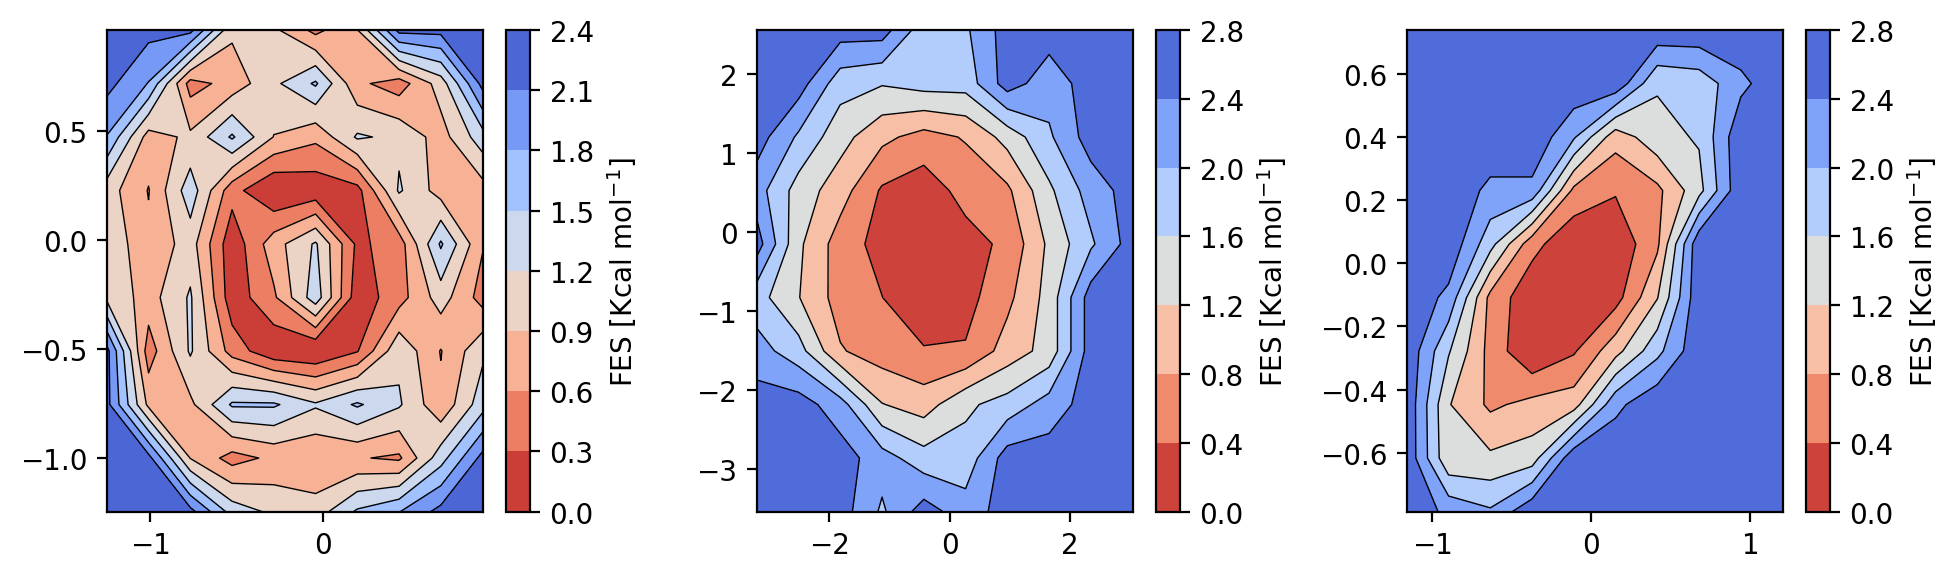

In [40]:
fig3, ax = plots.get_axes(**fig3_setup)

FES_calc = computes.fes.FES(units='kcal',
                            temp=300)

for i,D in enumerate(data_list):
    
    fes_compute_tmp = dict(
        X = D[:,0],
        Y = D[:,1],
        bins = 10
    )
    fes_plot = dict(
        figure=fig3, 
        axes=ax[i],
        levels = 7,
        contlabels = False,
        cbar_label = r'FES [Kcal mol$^{-1}$]'
    )

    fes_output = FES_calc.fit_plot(**fes_compute_tmp, 
                                   plotArgs=fes_plot)

fig3.tight_layout()